In [1]:
%matplotlib inline



Welcome to the "Data Transformaton" practical session.  

Programming Language : Python 
Editor : Jupyter Notebook. 

Pandas : Data loading, processing, transformation and manipulation.
Scikit-learn : Example data source, ML and statistical analysis

# Data Scaling and Normalization

- Different Types of Normalization.

### Data Set Used :

Breast Cancer Wisconsin (Diagnostic) Data Set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].
   



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

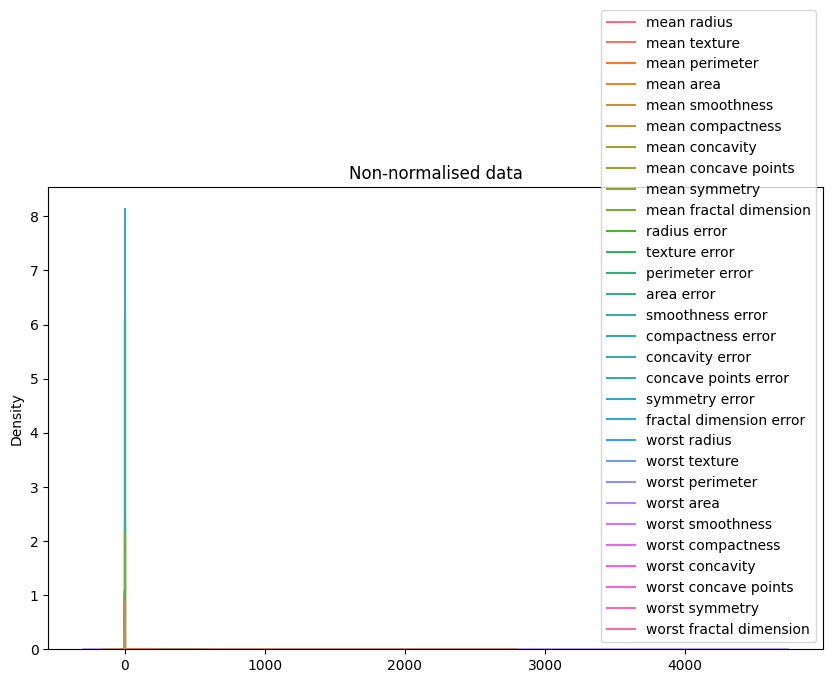

In [5]:
# Author:  Mamun Rashid <m.rrashid.1@gmail.com>

# License: BSD 3 clause

# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the dataset
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Let's look at the first few rows of the dataframe
print(df.head())

# Let's plot the data after min-max scaling
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df)
plt.title("Non-normalised data")
plt.show()




#### Strategy 1 : Min-Max scaling

Min-Max scaling: This transformation scales and translates each feature individually such that it is in the range [0, 1]. 
The transformed data is stored in df_minmax.


After Min-Max Scaling:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   mean fractal dimension  ...  worst radius  worst texture  worst 

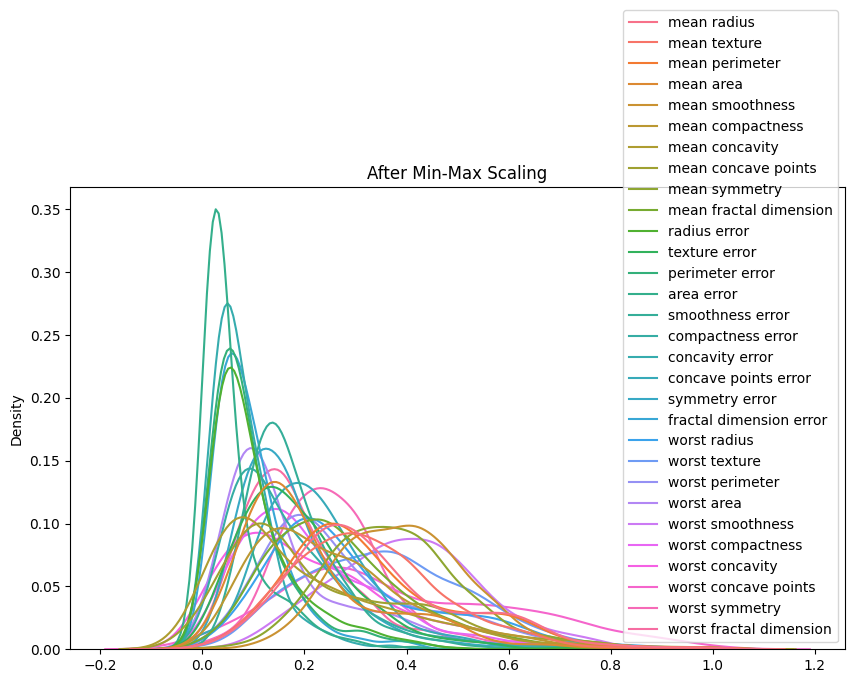

In [6]:
#### Strategy 1 : Min-Max scaling
scaler = preprocessing.MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df), columns=data.feature_names)
print("\nAfter Min-Max Scaling:\n", df_minmax.head())

# Let's plot the data after min-max scaling
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_minmax)
plt.title("After Min-Max Scaling")
plt.show()



### Log transformation: 
This transformation applies the natural logarithm to each value in the DataFrame. This is often used when the data is highly skewed, as it can help to make the data more "normal" (i.e., more closely approximate a normal distribution). The transformed data is stored in df_log.


In [ ]:
# Log Transformation
df_log = df.apply(np.log)
df_log = df_log.replace([np.inf, -np.inf], np.nan)
df_log = df_log.dropna()
print("\nAfter Log Transformation:\n", df_log.head())

### Z-score normalization: 
Also known as standardization, this transformation scales and translates
each feature so that it has a mean of 0 and a standard deviation of 1. 
The transformed data is stored in df_zscore.


Z-score normalization is a type of data standardization where we convert all features in our dataset to have a mean (µ) of 0 and a standard deviation (σ) of 1. The purpose of this transformation is to remove the scale effect of measurements.

The formula for Z-score normalization is:

Z = (X - µ) / σ

where:

Z is the standardized (Z-score normalized) value,
X is the original value,
µ is the mean of the feature,
σ is the standard deviation of the feature.
Why do we do this? In machine learning, many algorithms (like K-nearest neighbors, Neural Networks, and others) perform better when their input features are roughly on the same scale and centered around zero. If one feature has a range of -1 to 1, while another feature has a range of -1000 to 1000, the second feature will completely dominate when these features are combined, even though the first feature might be just as important.

After Z-score normalization, every feature in the dataset will have a mean of 0 and a standard deviation of 1, putting them all on roughly the same scale. The data values in each column now represent how many standard deviations the original value was from the mean of that column. This makes it easier to compare different features, and helps many machine learning algorithms perform better.

In [ ]:
# Z-score normalization
scaler = preprocessing.StandardScaler()
df_zscore = pd.DataFrame(scaler.fit_transform(df), columns=data.feature_names)
print("\nAfter Z-score Normalization:\n", df_zscore.head())

# Let's plot the data after Z-score normalization
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_zscore)
plt.title("After Z-score Normalization")
plt.show()


### Power transformation (Cube): 
This transformation raises each value in the DataFrame to the power of 3. It can be used to increase the skewness in the data.

In [ ]:
# Power transformation (cube)
df_power = df.apply(lambda x: x**3)
print("\nAfter Power Transformation:\n", df_power.head())

# Let's plot the data after power transformation
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_power)
plt.title("After Power Transformation")
plt.show()

### Quantile transformation: 
Quantile transformation, also known as quantile normalization, is a technique for making two distributions identical in statistical properties. To achieve this, it maps the values from the input distribution to a desired output distribution, such as a uniform or a normal distribution.

The process can be summarized as follows:

For each feature, sort the values in ascending order.

The smallest value is replaced with the smallest value from the desired distribution, the second smallest with the second smallest, and so on.

This way, the transformed data will have the same distribution as the desired output distribution, while preserving the rank of the original data.

One of the main uses of quantile transformation is to reduce the impact of outliers. Because it's based on the rank of the data, not the actual values, extreme values will be closer to the rest of the data after transformation.

Another use is to make non-linear data more suitable for linear models. If a feature has a distribution that's skewed or has a heavy tail, quantile transformation can help make it more "normal", so that linear models can make better predictions.

/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (569). n_quantiles is set to n_samples.
  warnings.warn(



After Quantile Transformation:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.982803     -2.918152        1.100471   0.993590         1.602003   
1     1.634697     -0.277117        1.466157   1.705892        -0.777914   
2     1.352998      0.513796        1.336647   1.320645         0.993590   
3    -0.820429      0.356013       -0.516316  -0.937325         2.694840   
4     1.512992     -1.221674        1.618134   1.586279         0.325612   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          2.373809        1.936415             1.922225       1.936415   
1         -0.281706        0.258819             0.641610       0.092808   
2          1.080478        1.235756             1.687281       0.989982   
3          2.556820        1.602003             1.352998       2.373809   
4          0.754241        1.259786             1.336647       0.075093   

   mean fractal dimension  ...  worst radius  worst texture

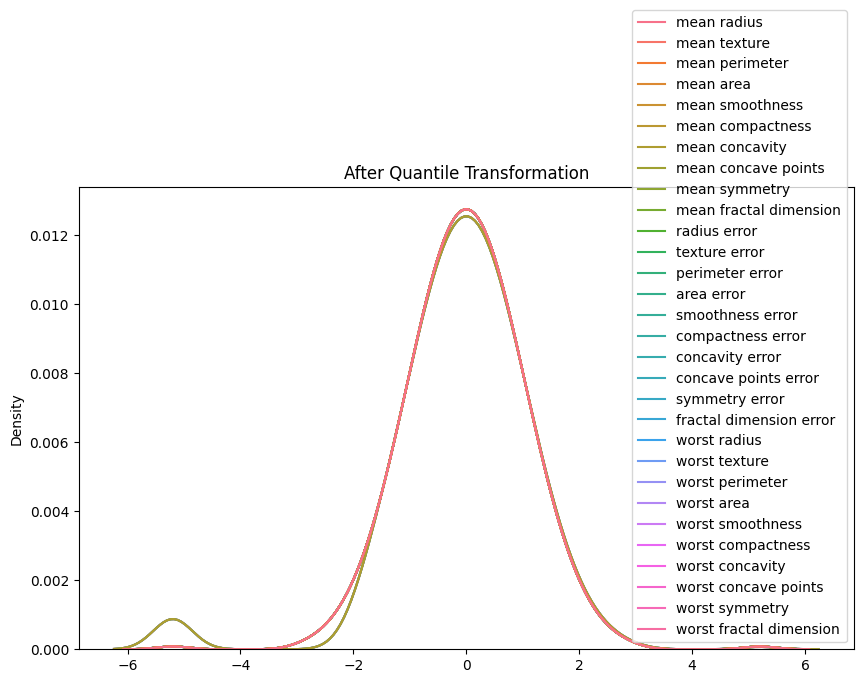

In [4]:
# Quantile transformation
scaler = preprocessing.QuantileTransformer(output_distribution='normal')
df_quantile = pd.DataFrame(scaler.fit_transform(df), columns=data.feature_names)
print("\nAfter Quantile Transformation:\n", df_quantile.head())

# Let's plot the data after quantile transformation
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_quantile)
plt.title("After Quantile Transformation")
plt.show()

#### Your Task 

## Question 1: 
    1.1 Load the Bupa Data set and apply Quantile Normalization on each feature.
    1.2 Remove the Label column ("selector") from the data set.
    1.3 Visualize the data before and after normalization using boxplot. 
    

## Question 2: Apply Winsorize method threshold of lower limit = 0.10 and upper limit = 0.80 on BUPA Liver data set
    2.1 What is the shape of the dataset after applying Winsorize method ? 


     mcv  alkalinephosphotase  alamine  aspartate  gammaGlut  drinks  selector
0     85                   92       45         27         31     0.0         1
1     85                   64       59         32         23     0.0         2
2     86                   54       33         16         54     0.0         2
3     91                   78       34         24         36     0.0         2
4     87                   70       12         28         10     0.0         2
..   ...                  ...      ...        ...        ...     ...       ...
340   99                   75       26         24         41    12.0         1
341   96                   69       53         43        203    12.0         2
342   98                   77       55         35         89    15.0         1
343   91                   68       27         26         14    16.0         1
344   98                   99       57         45         65    20.0         1

[345 rows x 7 columns]
\Before Quantile Transformat

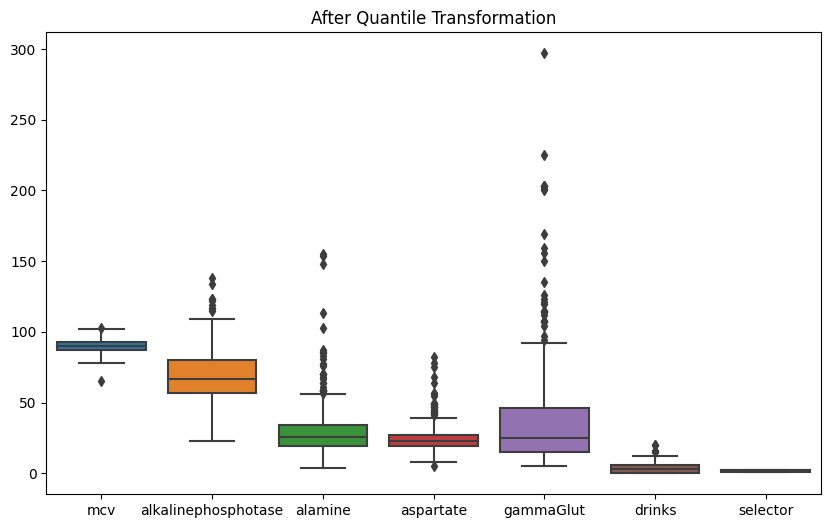


After Quantile Transformation:



/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (345). n_quantiles is set to n_samples.
  warnings.warn(


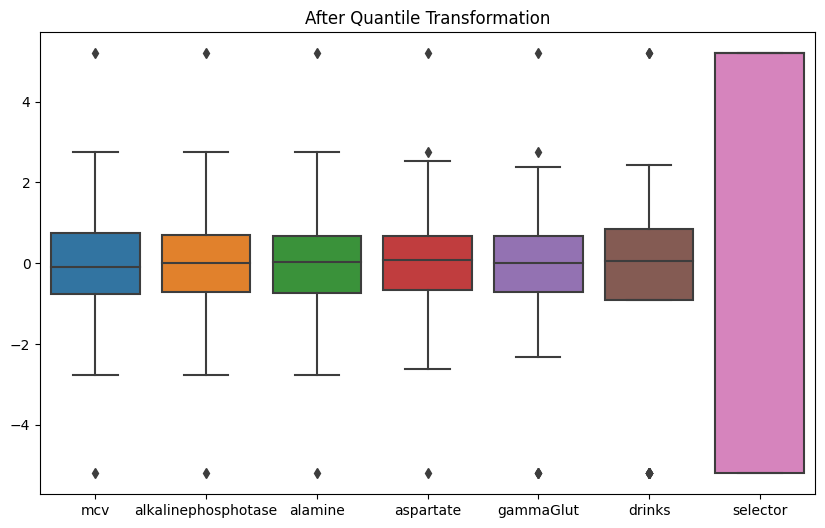

In [13]:
df_bupa = pd.read_csv('bupa.csv')
df_bupa = df_bupa.dropna()

print(df_bupa)

print("\Before Quantile Transformation:\n")
# Let's plot the data after quantile transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bupa)
plt.title("After Quantile Transformation")
plt.show()

scaler = preprocessing.QuantileTransformer(output_distribution='normal')
df_bupa_quantile = pd.DataFrame(scaler.fit_transform(df_bupa), columns=df_bupa.columns.values)

print("\nAfter Quantile Transformation:\n")
# Let's plot the data after quantile transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bupa_quantile)
plt.title("After Quantile Transformation")
plt.show()


In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.columns.values)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
